##EDA

In [1]:
## Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Import the data set
df=pd.read_csv('/content/drive/MyDrive/Resume_Projects/Medical_Insurance_Primimum_Price/Medicalpremium.csv')

In [3]:
## To display the first 5 rows of the data set
df.head(5)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,66,1,0,0,0,186,67,0,0,0,25000
1,66,1,1,0,0,179,96,0,0,2,28000
2,66,1,1,0,0,161,75,0,0,2,28000
3,66,1,0,0,0,169,55,0,0,0,25000
4,66,1,1,0,0,188,75,0,0,2,28000


In [4]:
## The shape of the data set
df.shape

(986, 11)

In [9]:
## Getting information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [20]:
# Define the categorical variables
categorical_vars = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily','NumberOfMajorSurgeries']
categorical_vars


['Diabetes',
 'BloodPressureProblems',
 'AnyTransplants',
 'AnyChronicDiseases',
 'KnownAllergies',
 'HistoryOfCancerInFamily',
 'NumberOfMajorSurgeries']

In [27]:
# Define numeric variables
Numeric_vars=['Age','Height','Weight','Premiumprice']
Numeric_vars


['Age', 'Height', 'Weight', 'Premiumprice']

In [15]:
# Convert categorical variables to 'category' dtype
df[categorical_vars] = df[categorical_vars].astype('category')

In [16]:
## Display new data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      986 non-null    int64   
 1   Diabetes                 986 non-null    category
 2   BloodPressureProblems    986 non-null    category
 3   AnyTransplants           986 non-null    category
 4   AnyChronicDiseases       986 non-null    category
 5   Height                   986 non-null    int64   
 6   Weight                   986 non-null    int64   
 7   KnownAllergies           986 non-null    category
 8   HistoryOfCancerInFamily  986 non-null    category
 9   NumberOfMajorSurgeries   986 non-null    category
 10  PremiumPrice             986 non-null    int64   
dtypes: category(7), int64(4)
memory usage: 38.6 KB


In [17]:
## Cheaking missing values
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [26]:
## Statistical measurements of the numeric variables
df.describe()

,Age,Height,Weight,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000
mean,41.745436,168.182556,76.950304,24336.713996
std,13.963371,10.098155,14.265096,6248.184382
min,18.000000,145.000000,51.000000,15000.000000
25%,30.000000,161.000000,67.000000,21000.000000
50%,42.000000,168.000000,75.000000,23000.000000
75%,53.000000,176.000000,87.000000,28000.000000
max,66.000000,188.000000,132.000000,40000.000000




*   The dataset includes individuals with an average age of 41.75 years, ranging from 18 to 66 years.

*   Most individuals (50%) fall between 30 and 53 years old, indicating a broad age distribution



In [29]:

# Get the correlation matrix for numeric variables
correlation_matrix = df[Numeric_vars].corr()
print(correlation_matrix)

                   Age    Height    Weight  PremiumPrice
Age           1.000000  0.039879 -0.018590      0.697540
Height        0.039879  1.000000  0.066946      0.026910
Weight       -0.018590  0.066946  1.000000      0.141507
PremiumPrice  0.697540  0.026910  0.141507      1.000000


In [30]:
#  create new varibles as BMI using height and welight

df['BMI'] = df['Weight'] / (df['Height'] / 100)**2
df.head()


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,66,1,0,0,0,186,67,0,0,0,25000,19.366401
1,66,1,1,0,0,179,96,0,0,2,28000,29.961612
2,66,1,1,0,0,161,75,0,0,2,28000,28.934069
3,66,1,0,0,0,169,55,0,0,0,25000,19.257029
4,66,1,1,0,0,188,75,0,0,2,28000,21.220009


In [31]:
# Get the correlation matrix for numeric variables
variables=["Age","BMI","PremiumPrice"]
correlation_matrix = df[variables].corr()
print(correlation_matrix)

                   Age       BMI  PremiumPrice
Age           1.000000 -0.042027      0.697540
BMI          -0.042027  1.000000      0.103812
PremiumPrice  0.697540  0.103812      1.000000



*   The relatively strong positive correlation (0.698) indicates that age is a significant factor influencing the premium price. Older individuals likely pay higher premiums.
*    According to the correlation matrix the Age seems to be a key factor in determining insurance premiums. The insurance company might consider focusing more on age when setting premium prices, as it shows a significant impact.



In [33]:
# need to new variable after categorize age like below . 0-16=child, Young adult=17-30, middle age adult=31-45, old age adult=above 45

def categorize_age(age):
  if age <= 16:
    return 'Child'
  elif age <= 30:
    return 'Young Adult'
  elif age <= 45:
    return 'Middle Age Adult'
  else:
    return 'Old Age Adult'

df['AgeCategory'] = df['Age'].apply(categorize_age)
df.head(2)


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,AgeCategory
0,66,1,0,0,0,186,67,0,0,0,25000,19.366401,Old Age Adult
1,66,1,1,0,0,179,96,0,0,2,28000,29.961612,Old Age Adult


In [38]:
# Calculate the average premium price for each age category
avg_price_by_age = df.groupby('AgeCategory')['PremiumPrice'].mean()
print(avg_price_by_age)

AgeCategory
Middle Age Adult    25031.545741
Old Age Adult       28453.431373
Young Adult         17057.471264
Name: PremiumPrice, dtype: float64


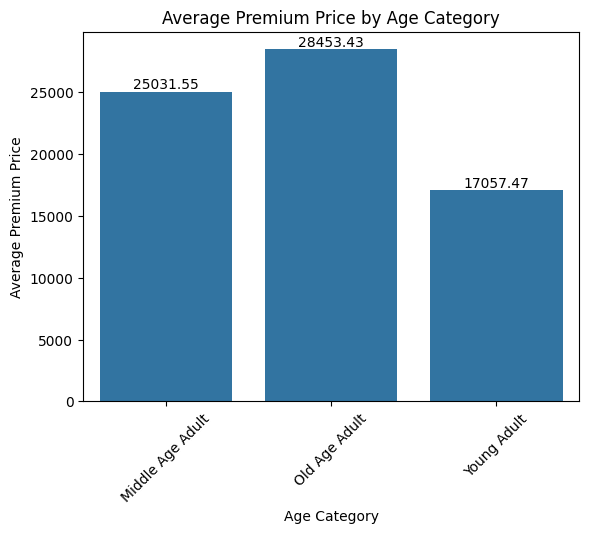

In [40]:
## Visualize the average primum price by Age Category

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average premium price by age category
avg_price = df.groupby('AgeCategory')['PremiumPrice'].mean()

# Create bar plot
sns.barplot(x=avg_price.index, y=avg_price.values)

# Display average price above each bar
for i, v in enumerate(avg_price.values):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

plt.title('Average Premium Price by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Average Premium Price')
plt.xticks(rotation=45)
plt.show()

Insurance companies often adjust premiums based on perceived risk factors associated with age. Older individuals may face higher premiums due to higher health risks typically associated with aging.

In [46]:
# Define and convert categorical variables
categorical_vars = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']
df[categorical_vars] = df[categorical_vars].astype('category')

# Create contingency tables for each pair of categorical variables
contingency_tables = {}
for var1 in categorical_vars:
    for var2 in categorical_vars:
        if var1 != var2:
            # Use var1 and var2 as strings to index the dataframe
            contingency_table = pd.crosstab(df[var1], df[var2])
            contingency_tables[(var1, var2)] = contingency_table # Use var1 and var2 to create the dictionary key

# Display contingency tables using pandas styling
for key, table in contingency_tables.items():
    print(f"Contingency table for {key[0]} and {key[1]}:")
    display(table.style.set_table_attributes("style='display:inline'").set_caption(f"{key[0]} vs {key[1]}")) # Display each table inline with a caption
    print()

Contingency table for Diabetes and BloodPressureProblems:


BloodPressureProblems,0,1
Diabetes,,
0,335,237
1,189,225



Contingency table for Diabetes and AnyTransplants:


AnyTransplants,0,1
Diabetes,,
0,536,36
1,395,19



Contingency table for Diabetes and AnyChronicDiseases:


AnyChronicDiseases,0,1
Diabetes,,
0,452,120
1,356,58



Contingency table for Diabetes and KnownAllergies:


KnownAllergies,0,1
Diabetes,,
0,433,139
1,341,73



Contingency table for Diabetes and HistoryOfCancerInFamily:


HistoryOfCancerInFamily,0,1
Diabetes,,
0,496,76
1,374,40



Contingency table for BloodPressureProblems and Diabetes:


Diabetes,0,1
BloodPressureProblems,,
0,335,189
1,237,225



Contingency table for BloodPressureProblems and AnyTransplants:


AnyTransplants,0,1
BloodPressureProblems,,
0,492,32
1,439,23



Contingency table for BloodPressureProblems and AnyChronicDiseases:


AnyChronicDiseases,0,1
BloodPressureProblems,,
0,438,86
1,370,92



Contingency table for BloodPressureProblems and KnownAllergies:


KnownAllergies,0,1
BloodPressureProblems,,
0,409,115
1,365,97



Contingency table for BloodPressureProblems and HistoryOfCancerInFamily:


HistoryOfCancerInFamily,0,1
BloodPressureProblems,,
0,470,54
1,400,62



Contingency table for AnyTransplants and Diabetes:


Diabetes,0,1
AnyTransplants,,
0,536,395
1,36,19



Contingency table for AnyTransplants and BloodPressureProblems:


BloodPressureProblems,0,1
AnyTransplants,,
0,492,439
1,32,23



Contingency table for AnyTransplants and AnyChronicDiseases:


AnyChronicDiseases,0,1
AnyTransplants,,
0,766,165
1,42,13



Contingency table for AnyTransplants and KnownAllergies:


KnownAllergies,0,1
AnyTransplants,,
0,731,200
1,43,12



Contingency table for AnyTransplants and HistoryOfCancerInFamily:


HistoryOfCancerInFamily,0,1
AnyTransplants,,
0,820,111
1,50,5



Contingency table for AnyChronicDiseases and Diabetes:


Diabetes,0,1
AnyChronicDiseases,,
0,452,356
1,120,58



Contingency table for AnyChronicDiseases and BloodPressureProblems:


BloodPressureProblems,0,1
AnyChronicDiseases,,
0,438,370
1,86,92



Contingency table for AnyChronicDiseases and AnyTransplants:


AnyTransplants,0,1
AnyChronicDiseases,,
0,766,42
1,165,13



Contingency table for AnyChronicDiseases and KnownAllergies:


KnownAllergies,0,1
AnyChronicDiseases,,
0,630,178
1,144,34



Contingency table for AnyChronicDiseases and HistoryOfCancerInFamily:


HistoryOfCancerInFamily,0,1
AnyChronicDiseases,,
0,714,94
1,156,22



Contingency table for KnownAllergies and Diabetes:


Diabetes,0,1
KnownAllergies,,
0,433,341
1,139,73



Contingency table for KnownAllergies and BloodPressureProblems:


BloodPressureProblems,0,1
KnownAllergies,,
0,409,365
1,115,97



Contingency table for KnownAllergies and AnyTransplants:


AnyTransplants,0,1
KnownAllergies,,
0,731,43
1,200,12



Contingency table for KnownAllergies and AnyChronicDiseases:


AnyChronicDiseases,0,1
KnownAllergies,,
0,630,144
1,178,34



Contingency table for KnownAllergies and HistoryOfCancerInFamily:


HistoryOfCancerInFamily,0,1
KnownAllergies,,
0,698,76
1,172,40



Contingency table for HistoryOfCancerInFamily and Diabetes:


Diabetes,0,1
HistoryOfCancerInFamily,,
0,496,374
1,76,40



Contingency table for HistoryOfCancerInFamily and BloodPressureProblems:


BloodPressureProblems,0,1
HistoryOfCancerInFamily,,
0,470,400
1,54,62



Contingency table for HistoryOfCancerInFamily and AnyTransplants:


AnyTransplants,0,1
HistoryOfCancerInFamily,,
0,820,50
1,111,5



Contingency table for HistoryOfCancerInFamily and AnyChronicDiseases:


AnyChronicDiseases,0,1
HistoryOfCancerInFamily,,
0,714,156
1,94,22



Contingency table for HistoryOfCancerInFamily and KnownAllergies:


KnownAllergies,0,1
HistoryOfCancerInFamily,,
0,698,172
1,76,40


<Figure size 640x480 with 0 Axes>

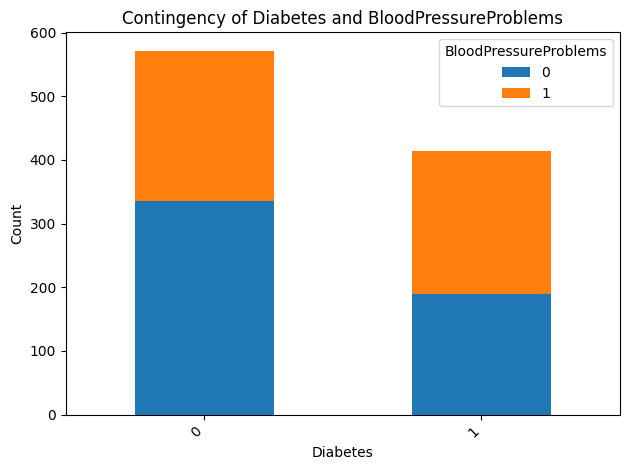

<Figure size 640x480 with 0 Axes>

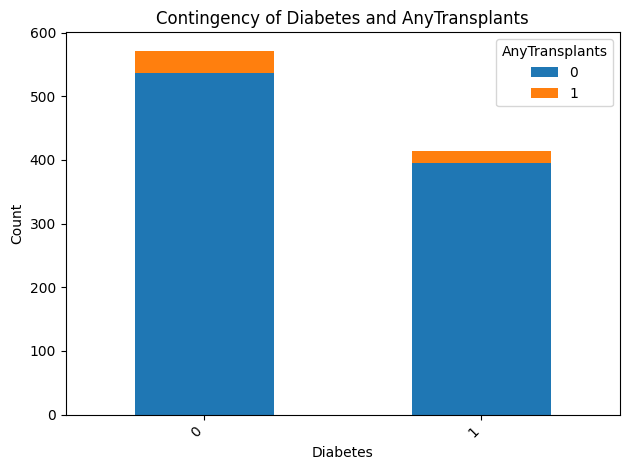

<Figure size 640x480 with 0 Axes>

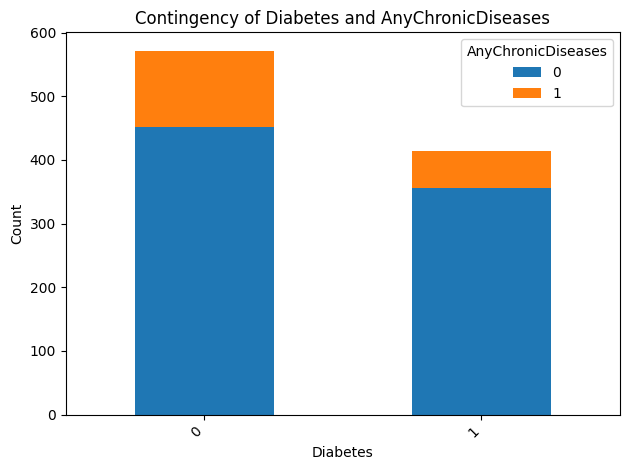

<Figure size 640x480 with 0 Axes>

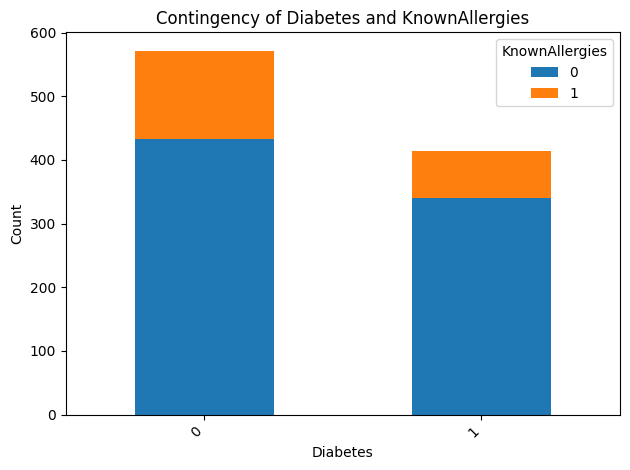

<Figure size 640x480 with 0 Axes>

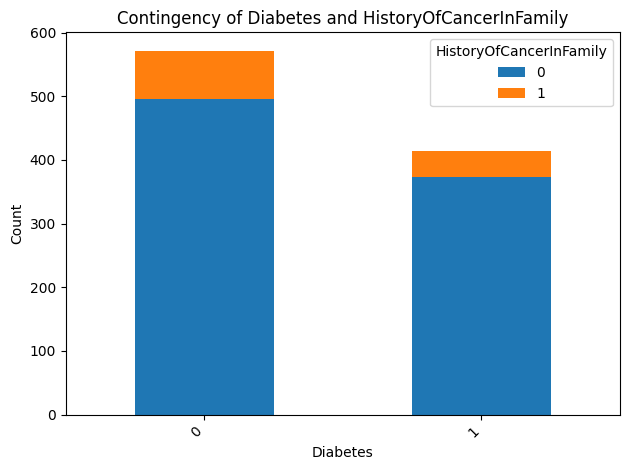

<Figure size 640x480 with 0 Axes>

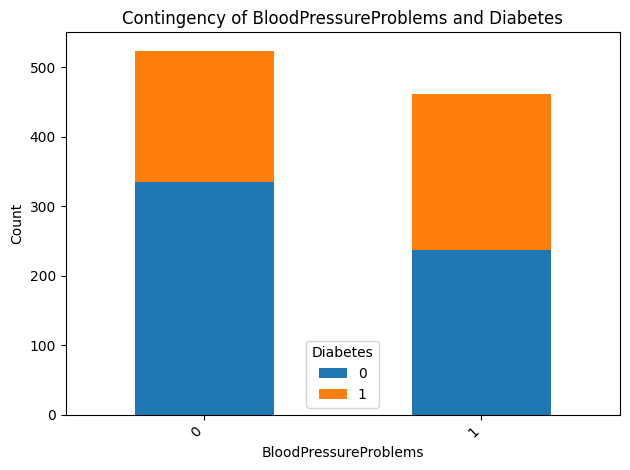

<Figure size 640x480 with 0 Axes>

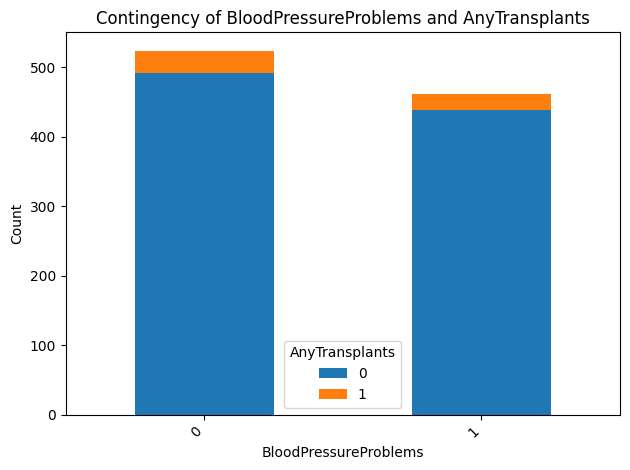

<Figure size 640x480 with 0 Axes>

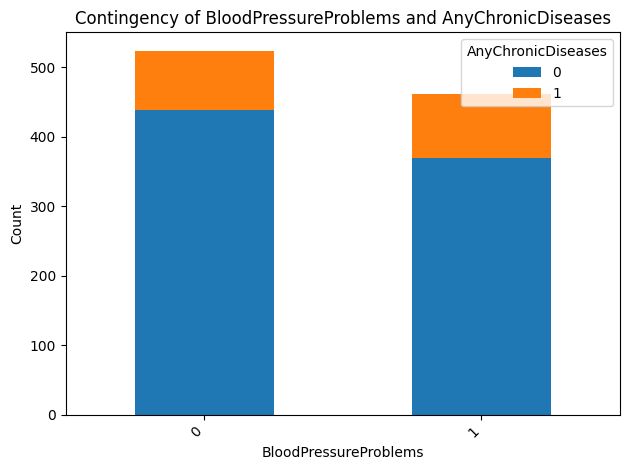

<Figure size 640x480 with 0 Axes>

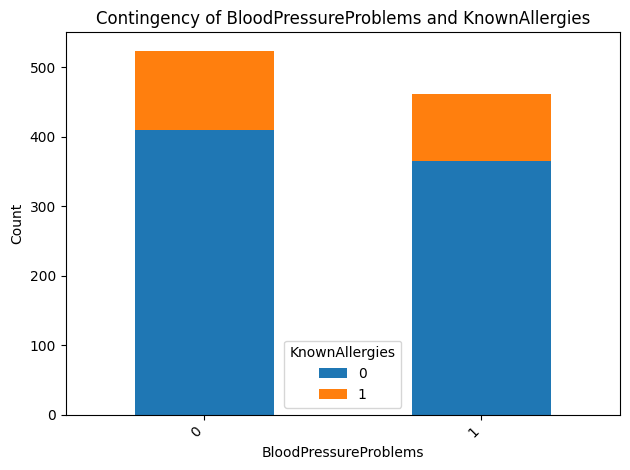

<Figure size 640x480 with 0 Axes>

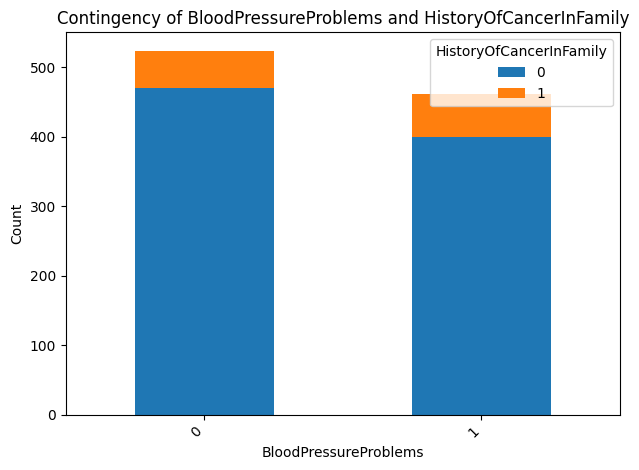

<Figure size 640x480 with 0 Axes>

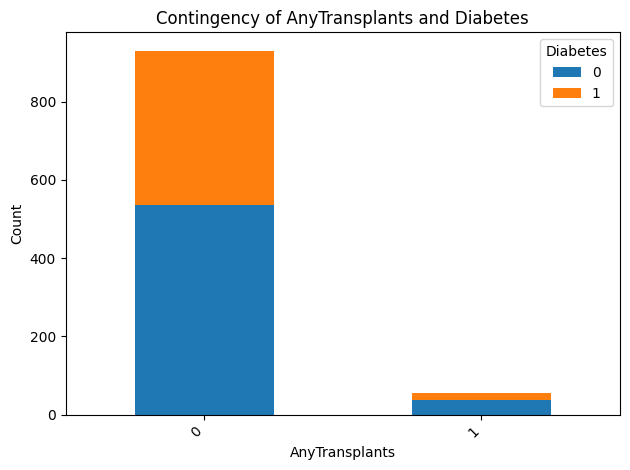

<Figure size 640x480 with 0 Axes>

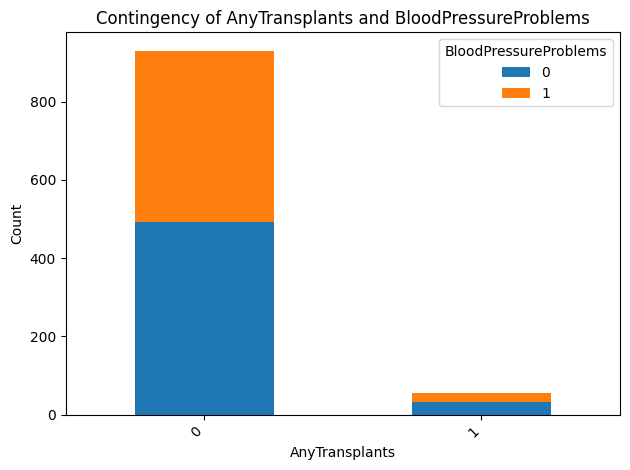

<Figure size 640x480 with 0 Axes>

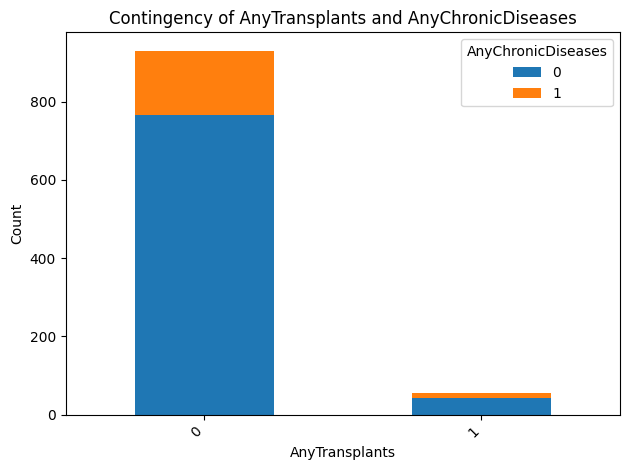

<Figure size 640x480 with 0 Axes>

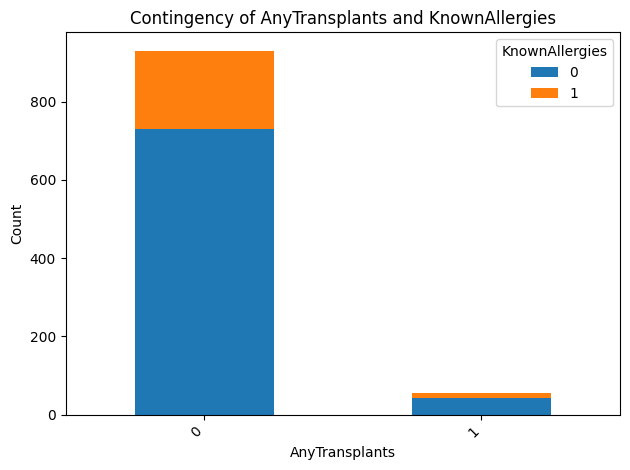

<Figure size 640x480 with 0 Axes>

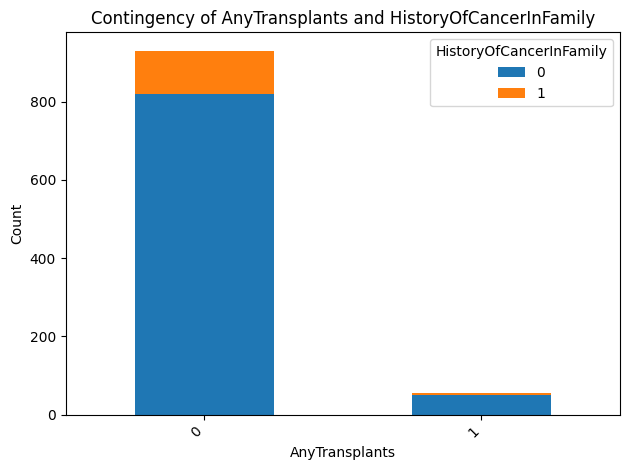

<Figure size 640x480 with 0 Axes>

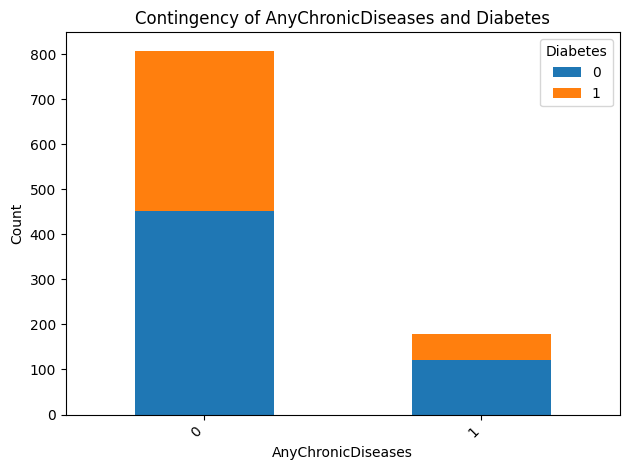

<Figure size 640x480 with 0 Axes>

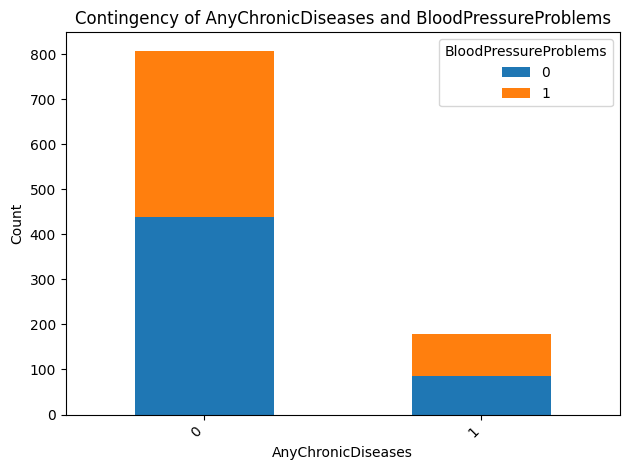

<Figure size 640x480 with 0 Axes>

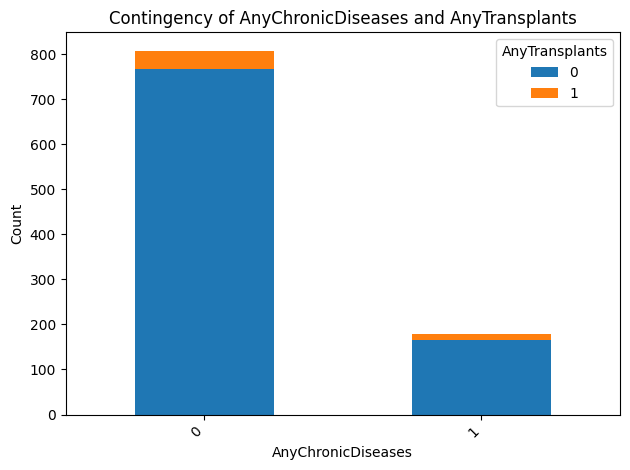

<Figure size 640x480 with 0 Axes>

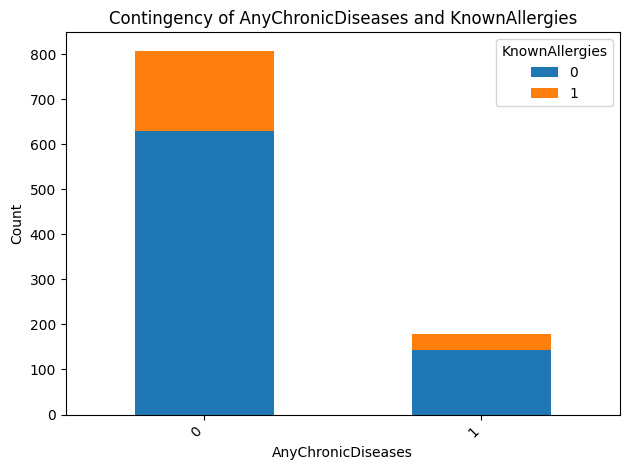

<Figure size 640x480 with 0 Axes>

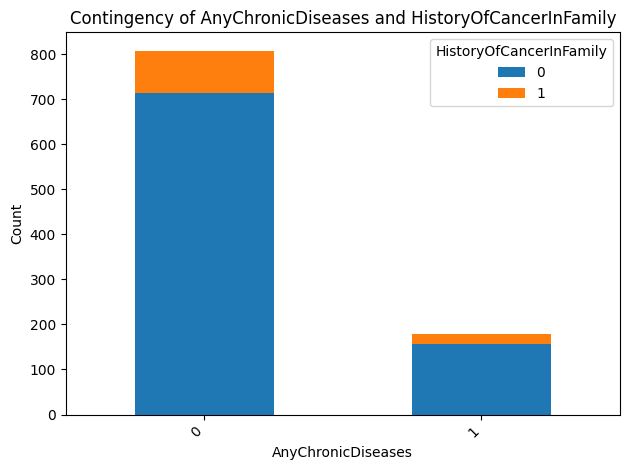

<Figure size 640x480 with 0 Axes>

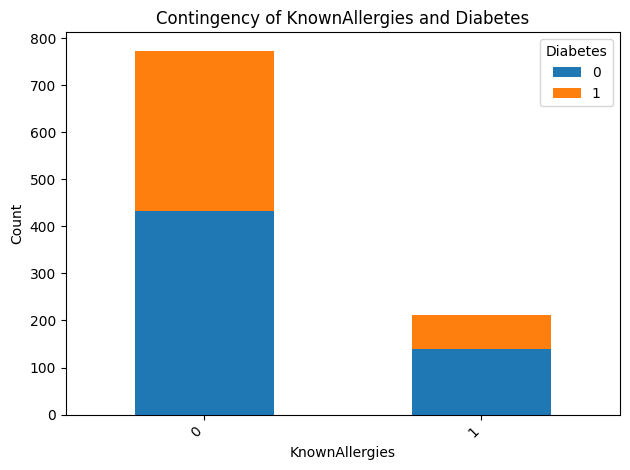

<Figure size 640x480 with 0 Axes>

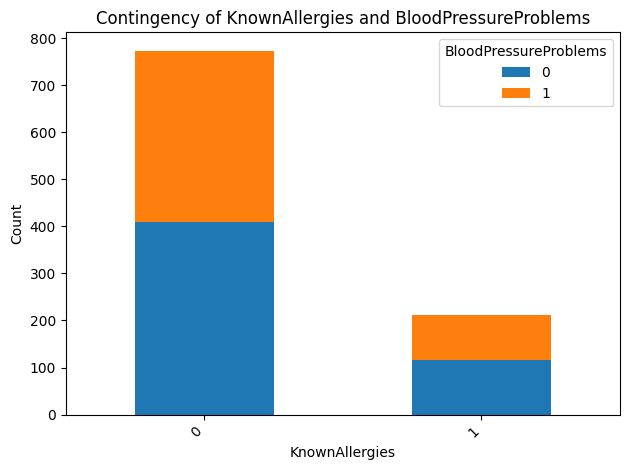

<Figure size 640x480 with 0 Axes>

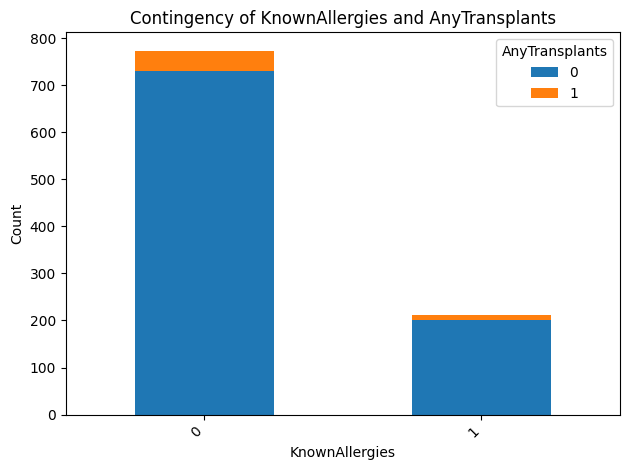

<Figure size 640x480 with 0 Axes>

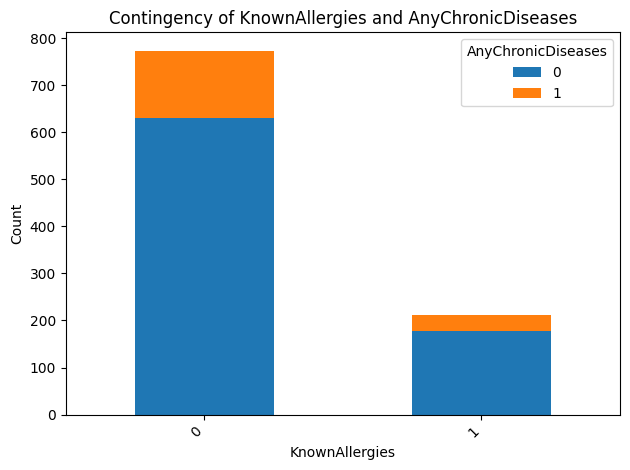

<Figure size 640x480 with 0 Axes>

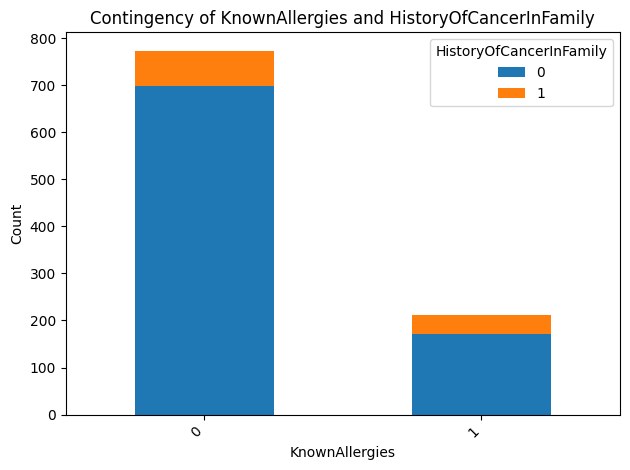

<Figure size 640x480 with 0 Axes>

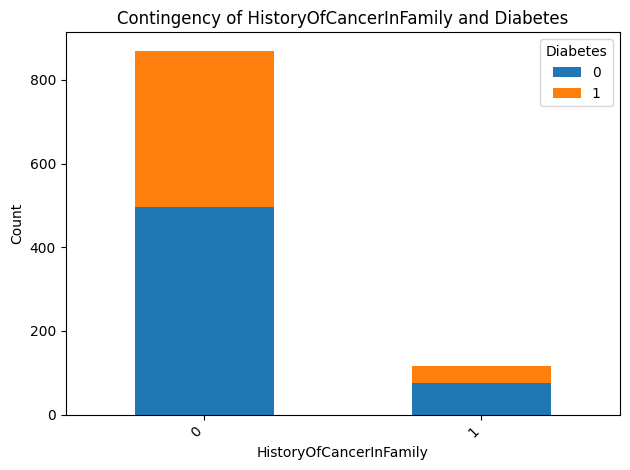

<Figure size 640x480 with 0 Axes>

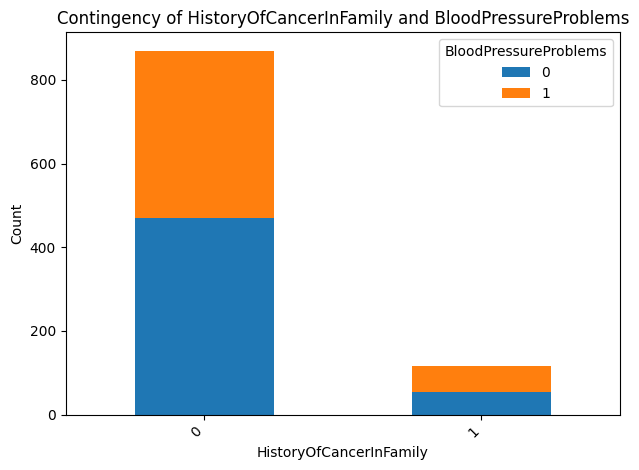

<Figure size 640x480 with 0 Axes>

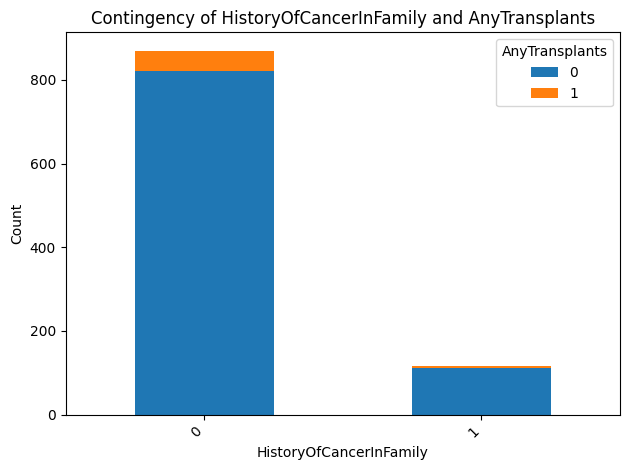

<Figure size 640x480 with 0 Axes>

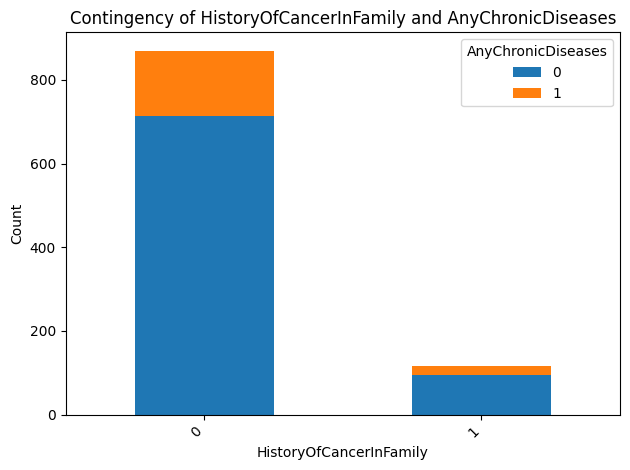

<Figure size 640x480 with 0 Axes>

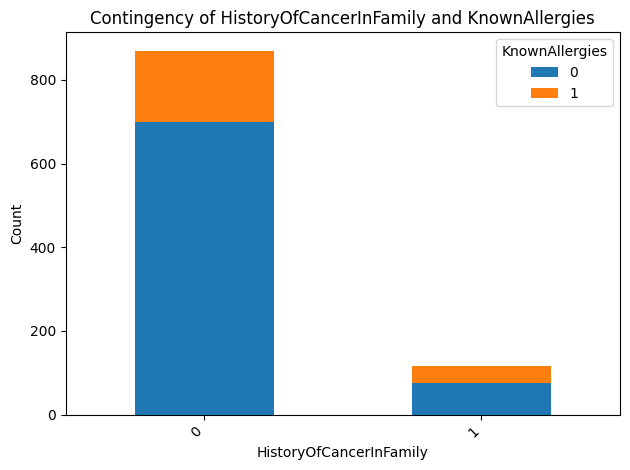

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_vars = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']
df[categorical_vars] = df[categorical_vars].astype('category')

for var1 in categorical_vars:
    for var2 in categorical_vars:
        if var1 != var2:
            plt.figure() # Create a new figure for each plot
            pd.crosstab(df[var1], df[var2]).plot(kind='bar', stacked=True) # Directly plot the crosstab as a bar plot
            plt.title(f"Contingency of {var1} and {var2}")
            plt.xlabel(var1)
            plt.ylabel("Count")
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

Conclusion


*   Diabetes and Health Conditions:
There is a tendency for individuals with Diabetes to also have other health conditions such as BloodPressureProblems, AnyChronicDiseases, and a possible history of cancer in the family. These associations suggest that Diabetes may be correlated with a higher likelihood of other health issues.
*   Blood Pressure Problems:
Individuals with BloodPressureProblems do not show clear associations with other variables in the provided tables, indicating that BloodPressureProblems may not strongly correlate with the presence of other health conditions or medical histories in this dataset.

*   AnyTransplants, AnyChronicDiseases, KnownAllergies, and History of Cancer in Family:
These variables also do not consistently show strong associations with each other in the provided tables. This suggests that the presence of AnyTransplants, AnyChronicDiseases, KnownAllergies, or a history of cancer in the family may occur independently of each other in this dataset.



